In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


df = pd.read_csv("Enterprise_GenAI_Adoption_Impact 2.csv")


features = df[[
    "Training Hours Provided",
    "Number of Employees Impacted",
    "New Roles Created",
    "Productivity Change (%)",
    "Adoption Year"
]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


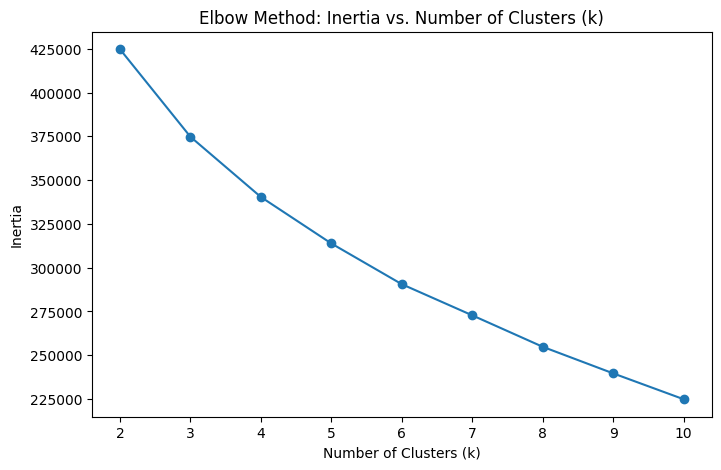

In [5]:
inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.title("Elbow Method: Inertia vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

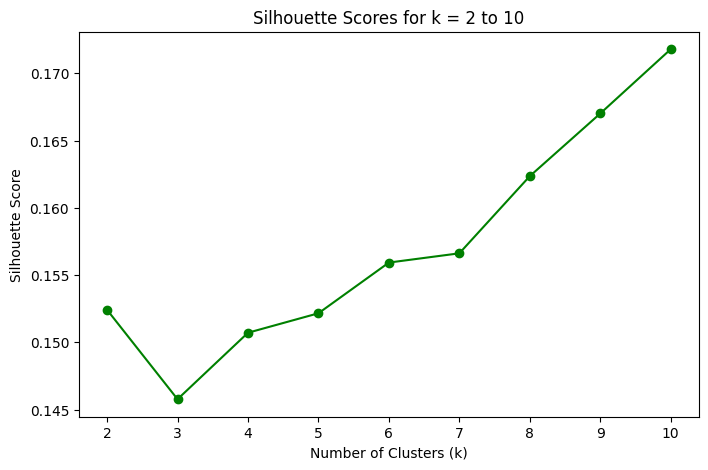

In [6]:
from sklearn.metrics import silhouette_score


n_samples = 5000
rng = np.random.default_rng(42)
idx = rng.choice(len(X_scaled), size=n_samples, replace=False)
X_sub = X_scaled[idx]

# Silhouette Scores
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sub)
    score = silhouette_score(X_sub, labels)
    sil_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, marker='o', color='green')
plt.title("Silhouette Scores for k = 2 to 10")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.show()


In [18]:
df = pd.read_csv("Enterprise_GenAI_Adoption_Impact 2.csv")

feature_cols = [
    "Training Hours Provided",
    "Number of Employees Impacted",
    "New Roles Created",
    "Productivity Change (%)",
    "Adoption Year"
]

features = df[feature_cols].copy()
for col in feature_cols:
    features[col] = pd.to_numeric(features[col], errors="coerce")

features_clean = features.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_clean)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

features_clean["Cluster"] = labels

centroids_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids_unscaled, columns=feature_cols)
centroid_df["Cluster"] = centroid_df.index

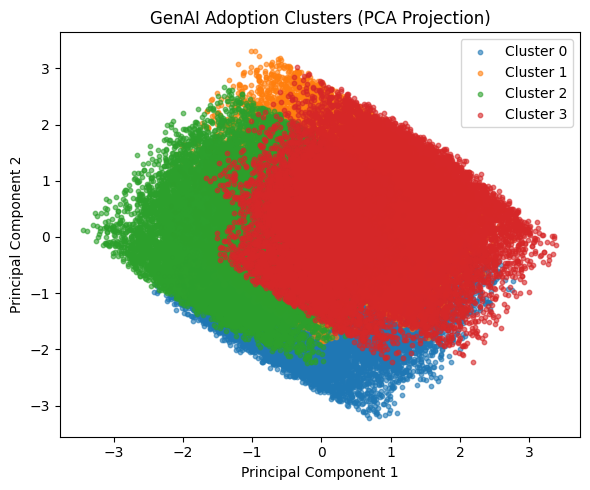

In [19]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in sorted(pca_df["Cluster"].unique()):
    subset = pca_df[pca_df["Cluster"] == c]
    plt.scatter(
        X_pca[subset.index,0],
        X_pca[subset.index,1],
        s=10,
        alpha=0.6,
        label=f"Cluster {c}"
    )
plt.title("GenAI Adoption Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
cluster_summary = features_clean.groupby("Cluster").agg({
    "Training Hours Provided": ["mean", "median"],
    "Number of Employees Impacted": ["mean", "median"],
    "New Roles Created": ["mean", "median"],
    "Productivity Change (%)": ["mean", "median"],
    "Adoption Year": ["mean", "median"]
})

print(cluster_summary)

        Training Hours Provided          Number of Employees Impacted  \
                           mean   median                         mean   
Cluster                                                                 
0                  12653.386683  12631.5                 10049.249056   
1                  12848.274869  12808.0                 10076.021530   
2                  12704.208048  12727.0                 10097.663865   
3                  12763.460554  12817.0                  9983.810572   

                 New Roles Created        Productivity Change (%)         \
          median              mean median                    mean median   
Cluster                                                                    
0        10067.0         23.445351   24.0               21.292847   21.9   
1        10090.0         18.031259   19.0                9.781608    9.4   
2        10098.5          7.556932    7.0               15.610574   14.9   
3         9919.0         13.0284

In [21]:
cluster_0 = df_clusters[df_clusters["Cluster"] == 0]
cluster_0.head()

,Training Hours Provided,Number of Employees Impacted,New Roles Created,Productivity Change (%),Adoption Year,Cluster
4,3925,8364,22,2.5,2024,0
10,2672,10799,21,22.4,2023,0
16,1574,249,22,20.6,2023,0
18,16397,18804,24,10.4,2024,0
21,12534,5887,16,32.5,2024,0


In [22]:
cluster_1 = df_clusters[df_clusters["Cluster"] == 1]
cluster_1.head()

,Training Hours Provided,Number of Employees Impacted,New Roles Created,Productivity Change (%),Adoption Year,Cluster
2,4680,11307,17,11.5,2023,1
3,1750,18834,12,7.0,2023,1
6,2593,994,11,6.6,2022,1
11,24129,14721,25,12.4,2022,1
17,21301,8697,29,9.2,2022,1


In [23]:
cluster_2 = df_clusters[df_clusters["Cluster"] == 2]
cluster_2.head()

,Training Hours Provided,Number of Employees Impacted,New Roles Created,Productivity Change (%),Adoption Year,Cluster
14,10291,9583,13,2.9,2024,2
15,4167,17257,1,6.1,2024,2
23,10061,17481,14,12.1,2024,2
29,2520,5341,5,34.9,2024,2
36,9696,15115,5,10.1,2024,2


In [24]:
cluster_3 = df_clusters[df_clusters["Cluster"] == 3]
cluster_3.head()

,Training Hours Provided,Number of Employees Impacted,New Roles Created,Productivity Change (%),Adoption Year,Cluster
0,657,5277,8,25.2,2022,3
1,23021,18762,17,27.5,2023,3
5,11485,16082,16,19.9,2022,3
7,11692,16429,16,20.4,2022,3
8,22484,12952,7,29.5,2022,3
